### Image formation 
We know the properties of light and optics, and how rays travel from the light source to a screen to form an image. A camera works on the same principle, but instead of a screen, it captures the light rays on a sensor and transforms them into RGB pixel values.


![Image formation in pinhole camera](visulization_data/Pinhole-camera.png)


Light rays from a scene travel and converge at the image plane, where a sharp image is formed. The optical center is the point from which these rays appear to diverge. The focal length is the distance from this point to the image plane, affecting how the scene is scaled in the image


### Camera Intrinsics

The camera intrinsic matrix (K) describes how 3D points in camera coordinates are projected onto the 2D image plane:

$$K = \begin{bmatrix}
f_x & 0 & c_x \\
0 & f_y & c_y \\
0 & 0 & 1
\end{bmatrix}$$

Where:
- $f_x$, $f_y$: Focal length in pixels (in x and y directions)
- $c_x$, $c_y$: Principal point coordinates (optical center on the image plane)

This matrix encapsulates the internal optical characteristics of the camera, independent of the camera's position and orientation in the world.

For more information, see: [Camera Parameters in Computer Vision](https://towardsdatascience.com/what-are-intrinsic-and-extrinsic-camera-parameters-in-computer-vision-7071b72fb8ec/)

### Camera Extrinsics

![Image Plane](visulization_data/intrnsics.png)

When a 3D point at coordinates **(x, y, z)** in Cartesian space is projected onto the 2D image plane, it undergoes a transformation from world space to image (pixel) space **(u, v)**. This transformation involves a rotation **R** and translation **T**, and is represented by the **projection matrix**:
$$\begin{bmatrix} u \\ v \\ 1 \end{bmatrix} = P \begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix} = K[R|T] \begin{bmatrix} x \\ y \\ z \\ 1 \end{bmatrix}$$

Where:

- **K** is the intrinsic camera matrix (describing internal parameters),
- **R** is the rotation matrix,
- **T** is the translation vector.

In theory, this allows us to map 3D world coordinates to 2D image coordinates. However, the inverse mapping—from **(u, v)** back to **(x, y, z)**—is not directly possible because the projection is a many-to-one transformation. This loss of depth information makes it non-symmetric and inherently **ill-posed**, which is one of the core challenges in 3D computer vision and depth reconstruction.




### Lens and Distortion

### Understanding Optical Aberrations

Lens distortions are optical aberrations that cause straight lines in the real world to appear curved in captured images. These distortions are not defects but natural consequences of the physical properties and design of camera lenses.

When light passes through a lens, its path can be altered in ways that don't perfectly preserve the straight-line geometry of the original scene. These aberrations become particularly noticeable in images containing straight lines, especially near the edges of the frame.

![Lens Distortion Example](visulization_data/distorted_image.jpg)
## Do you see the straight lines? Do you think the image is distorted or does the dancing house windows not follow straight lines?

### Key Points:

- **Physical Cause**: Results from the geometric properties of lens elements
- **Impact**: Affects measurements, geometric accuracy, and visual aesthetics
- **Variability**: Different lens types exhibit different characteristic distortions
- **Correctability**: Can be mathematically modeled and corrected in post-processing

### Further Reading

- [Types of Distortion and Measurement Methods](https://www.image-engineering.de/library/image-quality/factors/1062-distortion)
- [Camera Visualization and Calibration](https://docs.nerf.studio/nerfology/model_components/visualize_cameras.html)

## Try to play with distortion values and see if you ever saw such distortion before

### Types of Lens Distortions



### 1. Barrel Distortion

**Causes:**
- Occurs when magnification decreases as you move away from the optical center
- Common in wide-angle lenses
- Lines appear to bow outward like a barrel

**Correction Method:**
- Can be modeled using radial distortion coefficients (k1, k2, k3)
- Corrected using the equation: x_corrected = x(1 + k1*r² + k2*r⁴ + k3*r⁶)

![Image Description](visulization_data/barrel_dist.png)

**Calibration Views Needed:**
- Straight-on (front-facing) views with checkerboard pattern
- Close-up views particularly effective

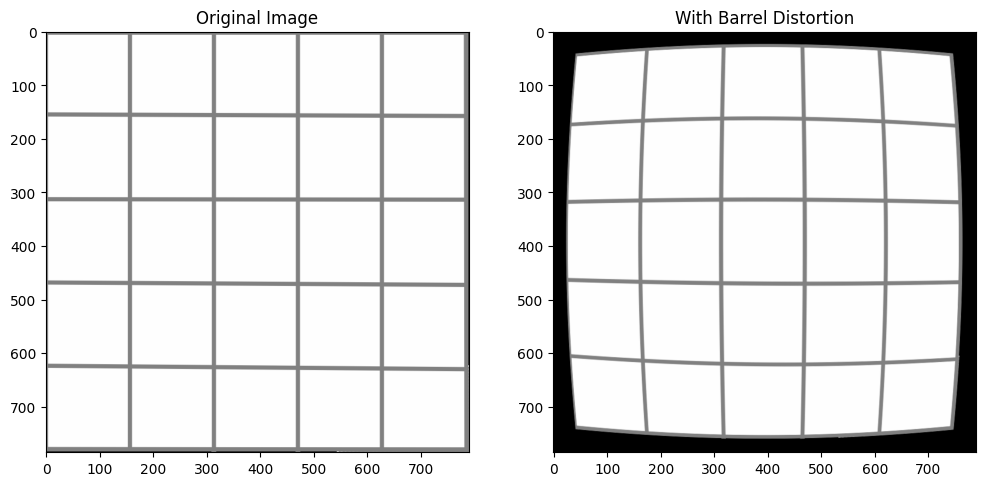

In [16]:
# Example of barrel distortion visualization
import numpy as np
import cv2
import matplotlib.pyplot as plt

def create_barrel_distortion(img, k1=-0.3):
    """Apply synthetic barrel distortion to an image"""
    h, w = img.shape[:2]
    # Create camera matrix
    cam_mat = np.array([[w, 0, w/2],
                       [0, w, h/2],
                       [0, 0, 1]])
    
    # Distortion coefficients [k1, k2, p1, p2, k3]
    dist_coeffs = np.array([k1, 0, 0, 0, 0])
    
    # Apply distortion
    distorted = cv2.undistort(img, cam_mat, -dist_coeffs)  # Negative to create distortion
    return distorted

# Example usage (commented out until we have an image)
img = cv2.imread('visulization_data/sample_grid.png')
if img is not None:
    barrel_img = create_barrel_distortion(img)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[1].imshow(cv2.cvtColor(barrel_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title('With Barrel Distortion')
    plt.show()

## 2. Pincushion Distortion

**Causes:**
- Occurs when magnification increases as you move away from the optical center
- Common in telephoto lenses
- Lines curve inward like a pincushion

**Correction Method:**
- Uses the same radial distortion model as barrel distortion but with opposite sign coefficients
- Software correction algorithms in post-processing

![Pincushion Distortion](visulization_data/pincu_dist.png)

**Calibration Views Needed:**
- Distant views of calibration pattern
- Edge-of-frame views to capture maximum distortion

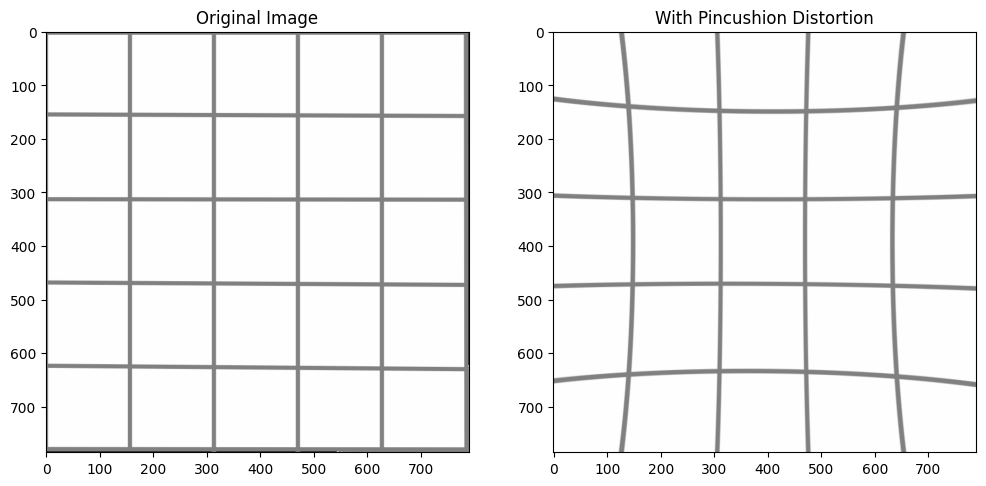

In [17]:
# Example of pincushion distortion visualization
def create_pincushion_distortion(img, k1=0.3):
    """Apply synthetic pincushion distortion to an image"""
    h, w = img.shape[:2]
    # Create camera matrix
    cam_mat = np.array([[w, 0, w/2],
                       [0, w, h/2],
                       [0, 0, 1]])
    
    # Distortion coefficients [k1, k2, p1, p2, k3]
    dist_coeffs = np.array([k1, 0, 0, 0, 0])
    
    # Apply distortion
    distorted = cv2.undistort(img, cam_mat, -dist_coeffs)  # Negative to create distortion
    return distorted

# Example usage (commented out until we have an image)
img = cv2.imread('visulization_data/sample_grid.png')
if img is not None:
    pincushion_img = create_pincushion_distortion(img)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[1].imshow(cv2.cvtColor(pincushion_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title('With Pincushion Distortion')
    plt.show()

## 3. Mustache Distortion

**Causes:**
- Complex aberrations in lens design
- Combination of barrel and pincushion distortions
- Common in zoom lenses

**Correction Method:**
- Requires higher-order polynomial models
- Often needs both radial and tangential distortion coefficients

![Mustache Distortion](visulization_data/mustach_dist.jpg)

**Calibration Views Needed:**
- Angled views of calibration pattern
- Multiple perspectives to capture transition between distortion types

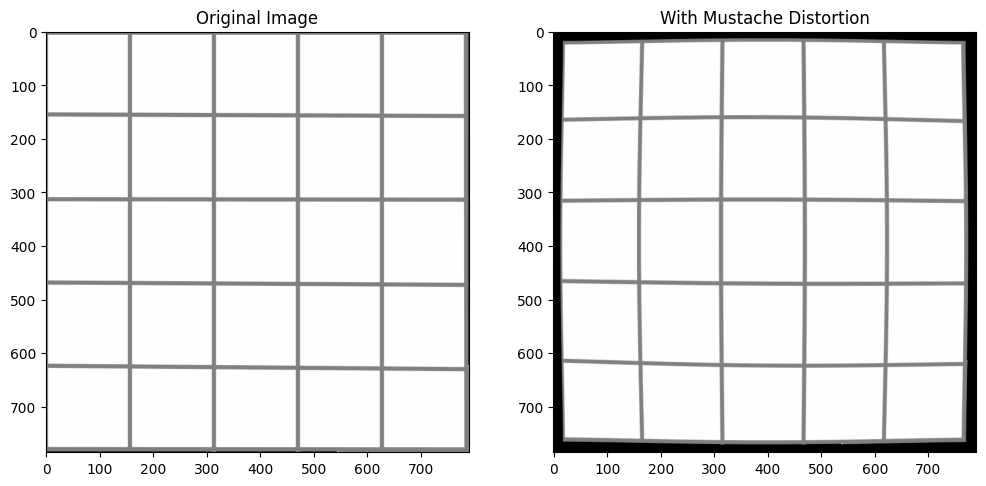

In [18]:
# Example of mustache distortion visualization
def create_mustache_distortion(img, k1=-0.2, k2=0.2):
    """Apply synthetic mustache distortion to an image"""
    h, w = img.shape[:2]
    # Create camera matrix
    cam_mat = np.array([[w, 0, w/2],
                       [0, w, h/2],
                       [0, 0, 1]])
    
    # Distortion coefficients [k1, k2, p1, p2, k3]
    dist_coeffs = np.array([k1, k2, 0, 0, 0])
    
    # Apply distortion
    distorted = cv2.undistort(img, cam_mat, -dist_coeffs)  # Negative to create distortion
    return distorted

# Example usage (commented out until we have an image)
img = cv2.imread('visulization_data/sample_grid.png')
if img is not None:
    mustache_img = create_mustache_distortion(img)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[1].imshow(cv2.cvtColor(mustache_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title('With Mustache Distortion')
    plt.show()

## 4. Tangential (Decentering) Distortion

**Causes:**
- Lens not perfectly aligned with camera sensor
- Optical elements inside lens are misaligned
- Creates asymmetrical distortion

![Tangential (Decentering) Distortion](visulization_data/tang_dist_1.png)

**Correction Method:**
- Modeled using tangential distortion coefficients (p1, p2)
- Correction equations:
  - x_corrected = x + [2p1xy + p2(r² + 2x²)]
  - y_corrected = y + [p1(r² + 2y²) + 2p2xy]

![Tangential (Decentering) Distortion](visulization_data/tang_dist_2.png)

**Calibration Views Needed:**
- Tilted and rotated views of calibration pattern
- Multiple orientations to detect asymmetries

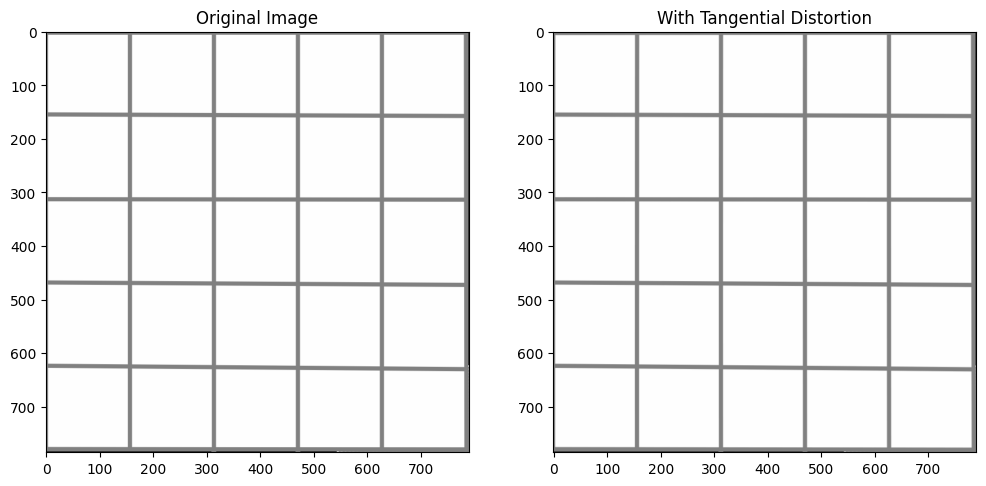

In [19]:
# Example of tangential distortion visualization
def create_tangential_distortion(img, p1=0.0005, p2=0.0005):
    """Apply synthetic tangential distortion to an image"""
    h, w = img.shape[:2]
    # Create camera matrix
    cam_mat = np.array([[w, 0, w/2],
                       [0, w, h/2],
                       [0, 0, 1]])
    
    # Distortion coefficients [k1, k2, p1, p2, k3]
    dist_coeffs = np.array([0, 0, p1, p2, 0])
    
    # Apply distortion
    distorted = cv2.undistort(img, cam_mat, -dist_coeffs)  # Negative to create distortion
    return distorted

# Example usage (commented out until we have an image)
img = cv2.imread('visulization_data/sample_grid.png')
if img is not None:
    tangential_img = create_tangential_distortion(img)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[1].imshow(cv2.cvtColor(tangential_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title('With Tangential Distortion')
    plt.show()

### Camera Calibration and Reprojection Error Calculation

In this section, we'll perform camera calibration using checkerboard images and calculate the reprojection error.

In [20]:
import cv2
import numpy as np
import glob
import os

def calibrate_camera(image_dir, checkerboard_size=(8, 5)):
    """Calibrate the camera and calculate reprojection error."""
    # Termination criteria for corner sub-pixel accuracy
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    # Prepare object points (e.g., (0,0,0), (1,0,0), ..., (8,5,0))
    objp = np.zeros((checkerboard_size[0] * checkerboard_size[1], 3), np.float32)
    objp[:, :2] = np.mgrid[0:checkerboard_size[0], 0:checkerboard_size[1]].T.reshape(-1, 2)

    # Arrays to store object points and image points
    objpoints = []  # 3D points in real world space
    imgpoints = []  # 2D points in image plane

    # Load all images from the directory
    # images = glob.glob(f"{image_dir}/*.jpg")
    images = image_dir

    for fname in images:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, checkerboard_size, None)

        if ret:
            objpoints.append(objp)
            corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
            imgpoints.append(corners2)

    # Perform camera calibration
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    # Calculate reprojection error
    total_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
        total_error += error

    mean_error = total_error / len(objpoints)

    return mtx, dist, mean_error, imgpoints, imgpoints2, rvecs, tvecs

# Analyze distortion coefficients
def analyze_distortion(dist_coeffs):
    """
    Analyze distortion coefficients to determine the type of lens distortion.
    
    Args:
        dist_coeffs: Array of distortion coefficients from camera calibration
    
    Returns:
        str: Description of the dominant distortion type
    """
    k1, k2, p1, p2, k3 = dist_coeffs.flatten()
    
    if k1 < 0 and abs(k1) > abs(k2):
        return "Barrel distortion is dominant (negative k1)"
    elif k1 > 0 and abs(k1) > abs(k2):
        return "Pincushion distortion is dominant (positive k1)"
    elif abs(p1) > 0.01 or abs(p2) > 0.01:
        return "Tangential distortion is present (p1 or p2 not close to zero)"
    else:
        return "No significant distortion detected"


# Example usage
image_directory = "datadataset/chessboard"
straight_on_images = [os.path.join(image_directory, "straight_on_1.jpg"),
                        os.path.join(image_directory, "straight_on_2.jpg"),
                        os.path.join(image_directory, "straight_on_3.jpg"),
                        ]

intrinsic_matrix, distortion_coeffs, reprojection_error, imgpoints, imgpoints2, rvecs, tvecs = calibrate_camera(straight_on_images)

print("\n--- Calibration Results for Straight-On Images ---")
print(f"Reprojection Error: {reprojection_error:.4f}")
print(f"Distortion Coefficients: {distortion_coeffs}")
print(f"Distortion Analysis: {analyze_distortion(distortion_coeffs)}")

end_of_the_frame_images = [os.path.join(image_directory, "end_of_the_frame_1.jpg"),
                        os.path.join(image_directory, "end_of_the_frame_2.jpg"),
                        os.path.join(image_directory, "end_of_the_frame_3.jpg"),
                        os.path.join(image_directory, "end_of_the_frame_4.jpg"),
                        ]

intrinsic_matrix, distortion_coeffs, reprojection_error, imgpoints, imgpoints2, rvecs, tvecs = calibrate_camera(end_of_the_frame_images)

print("\n--- Calibration Results for End-of-the-Frame Images ---")
print(f"Reprojection Error: {reprojection_error:.4f}")
print(f"Distortion Coefficients: {distortion_coeffs}")
print(f"Distortion Analysis: {analyze_distortion(distortion_coeffs)}")

tilted_and_rotated_images = [os.path.join(image_directory, "tilted_and_rotated_1.jpg"),
                        os.path.join(image_directory, "tilted_and_rotated_2.jpg"),
                        os.path.join(image_directory, "tilted_and_rotated_3.jpg"),
                        os.path.join(image_directory, "tilted_and_rotated_4.jpg"),
                        os.path.join(image_directory, "tilted_and_rotated_5.jpg"),
                        ]

intrinsic_matrix, distortion_coeffs, reprojection_error, imgpoints, imgpoints2, rvecs, tvecs = calibrate_camera(tilted_and_rotated_images)

print("\n--- Calibration Results for Tilted and Rotated Images ---")
print(f"Reprojection Error: {reprojection_error:.4f}")
print(f"Distortion Coefficients: {distortion_coeffs}")
print(f"Distortion Analysis: {analyze_distortion(distortion_coeffs)}")

angled_view_images = [os.path.join(image_directory, "angled_view_1.jpg"),
                        os.path.join(image_directory, "angled_view_2.jpg"),
                        ]

intrinsic_matrix, distortion_coeffs, reprojection_error, imgpoints, imgpoints2, rvecs, tvecs = calibrate_camera(angled_view_images)

print("\n--- Calibration Results for Angled View Images ---")
print(f"Reprojection Error: {reprojection_error:.4f}")
print(f"Distortion Coefficients: {distortion_coeffs}")
print(f"Distortion Analysis: {analyze_distortion(distortion_coeffs)}")

# all images
all_images = []
all_images.extend(straight_on_images)
all_images.extend(end_of_the_frame_images)
all_images.extend(tilted_and_rotated_images)
all_images.extend(angled_view_images)
intrinsic_matrix, distortion_coeffs, reprojection_error, imgpoints, imgpoints2, rvecs, tvecs = calibrate_camera(all_images)

print("\n--- Calibration Results for All Images ---")
print(f"Reprojection Error: {reprojection_error:.4f}")
print(f"Distortion Coefficients: {distortion_coeffs}")
print(f"Distortion Analysis: {analyze_distortion(distortion_coeffs)}")


[ WARN:0@466.546] global loadsave.cpp:268 findDecoder imread_('datadataset/chessboard/straight_on_1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


# Camera extrinsics

It's the transformation from object world to the camera. Camera extrinsics consist of rotation (R) and translation (t) matrices that define the camera's position and orientation in 3D world coordinates.

In [ ]:
def visualize_scene_with_cameras(points, colors, camera_poses, scale=0.2, imgpoints=None, imgpoints2=None, all_images=None):
    """Visualize 3D points, camera positions, and reprojection in a single plot with the actual camera image"""
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import cv2
    
    # Camera positions in world coordinates
    camera_positions = []
    camera_rotations = []
    
    for i, pose in enumerate(camera_poses):
        R = pose[:, :3]
        t = pose[:, 3]
        
        # Camera center (C = -R^T * t)
        center = -R.T @ t
        
        camera_positions.append(center)
        camera_rotations.append(R)
    
    # Create figure with subplots - 3D scene on left, camera image on right
    fig = make_subplots(
        rows=1, cols=2,
        column_widths=[0.7, 0.3],
        specs=[[{"type": "scene"}, {"type": "image"}]],
        subplot_titles=["3D Scene with Camera and Chessboard", "Camera Image"]
    )
    
    # Add 3D points (chessboard points in world coordinates)
    color_str = [f'rgb({int(r*255)},{int(g*255)},{int(b*255)})' for r, g, b in colors]
    fig.add_trace(go.Scatter3d(
        x=points[:, 0],
        y=points[:, 1], 
        z=points[:, 2],
        mode='markers',
        marker=dict(
            size=3,
            color=color_str,
            opacity=0.8
        ),
        name='Chessboard Points'
    ), row=1, col=1)
    
    # Add world coordinate frame (chessboard frame)
    axes_length = scale * 2
    axes_colors = ['darkred', 'darkgreen', 'darkblue']
    axes_names = ['X_world', 'Y_world', 'Z_world']
    
    # Origin of world coordinates (chessboard origin)
    world_origin = np.array([0, 0, 0])
    
    # Draw world coordinate axes - for chessboard, Z should point UP perpendicular to board
    for axis in range(3):
        direction = np.zeros(3)
        direction[axis] = axes_length
        
        fig.add_trace(go.Scatter3d(
            x=[world_origin[0], world_origin[0] + direction[0]],
            y=[world_origin[1], world_origin[1] + direction[1]],
            z=[world_origin[2], world_origin[2] + direction[2]],
            mode='lines+text',
            line=dict(color=axes_colors[axis], width=5),
            text=['', axes_names[axis]],
            textposition='top center',
            showlegend=False
        ), row=1, col=1)
    
    # Add cameras
    for i, (center, R) in enumerate(zip(camera_positions, camera_rotations)):
        # Camera position
        fig.add_trace(go.Scatter3d(
            x=[center[0]], 
            y=[center[1]], 
            z=[center[2]],
            mode='markers+text',
            marker=dict(size=10, color='red'),
            text=[f'Camera {i+1}'],
            name=f'Camera {i+1}'
        ), row=1, col=1)
        
        # Camera coordinate axes - proper camera convention
        axes_length = scale * 1.5
        axes_colors = ['red', 'green', 'blue']
        axes_names = [f'X_cam{i+1}', f'Y_cam{i+1}', f'Z_cam{i+1}']
        
        # Draw camera axes
        for axis in range(3):
            # Create unit vector in camera coordinates
            axis_dir = np.zeros(3)
            axis_dir[axis] = 1
            
            # Transform to world coordinates using camera rotation
            if axis == 2:
                # Z-axis points from camera toward scene
                world_dir = -R.T @ axis_dir
            else:
                world_dir = R.T @ axis_dir
                
            # Scale to requested length
            world_dir = world_dir * axes_length
            
            # Draw the axis
            fig.add_trace(go.Scatter3d(
                x=[center[0], center[0] + world_dir[0]],
                y=[center[1], center[1] + world_dir[1]],
                z=[center[2], center[2] + world_dir[2]],
                mode='lines+text',
                line=dict(color=axes_colors[axis], width=3),
                text=['', axes_names[axis]],
                textposition='top center',
                showlegend=False
            ), row=1, col=1)
    
    # Add detected and reprojected points near the chessboard
    if imgpoints is not None and imgpoints2 is not None and len(imgpoints) > 0:
        # Get the camera pose for the current camera
        R = camera_poses[0][:, :3]
        t = camera_poses[0][:, 3]
        
        # Get intrinsic matrix (assume it's passed in via arguments or global)
        # We need to actually access the global variable since we don't have it as a parameter
        global intrinsic_matrix
        
        # Detected points (blue)
        if len(imgpoints[0]) > 0:
            # Extract 2D image points
            img_pts = imgpoints[0].reshape(-1, 2)
            
            # For each image point, project a ray from camera to chessboard
            world_pts_detected = []
            for idx, pt in enumerate(img_pts):
                # The corresponding 3D point in world coordinates (from original points)
                world_pt = points[idx]
                
                # Create a slightly offset point to visualize detected points
                world_pts_detected.append(world_pt + np.array([0, 0, 0.05]))  # Offset in Z
            
            # Convert to numpy array
            world_pts_detected = np.array(world_pts_detected)
            
            # Add detected points to plot
            fig.add_trace(go.Scatter3d(
                x=world_pts_detected[:, 0],
                y=world_pts_detected[:, 1],
                z=world_pts_detected[:, 2],
                mode='markers',
                marker=dict(
                    size=5,
                    color='blue',
                    symbol='circle'
                ),
                name='Detected Points (Blue)'
            ), row=1, col=1)
            
            # Connect original points to detected points with lines
            for i in range(len(world_pts_detected)):
                fig.add_trace(go.Scatter3d(
                    x=[points[i, 0], world_pts_detected[i, 0]],
                    y=[points[i, 1], world_pts_detected[i, 1]],
                    z=[points[i, 2], world_pts_detected[i, 2]],
                    mode='lines',
                    line=dict(color='blue', width=1),
                    showlegend=False
                ), row=1, col=1)
        
        # Reprojected points (red)
        if imgpoints2 is not None:
            # Handle the case where imgpoints2 is a list
            if isinstance(imgpoints2, list):
                # Extract the first element if it's a list
                imgpoints2_data = imgpoints2[0]
            else:
                imgpoints2_data = imgpoints2
                
            # Extract 2D reprojected points
            reproj_pts = imgpoints2_data.reshape(-1, 2)
            
            # For each reprojected point, create a visual point
            world_pts_reprojected = []
            for idx, pt in enumerate(reproj_pts):
                # The corresponding 3D point in world coordinates
                world_pt = points[idx]
                
                # Create a slightly offset point to visualize reprojected points
                world_pts_reprojected.append(world_pt + np.array([0, 0, 0.1]))  # Higher offset in Z
            
            # Convert to numpy array
            world_pts_reprojected = np.array(world_pts_reprojected)
            
            # Add reprojected points to plot
            fig.add_trace(go.Scatter3d(
                x=world_pts_reprojected[:, 0],
                y=world_pts_reprojected[:, 1],
                z=world_pts_reprojected[:, 2],
                mode='markers',
                marker=dict(
                    size=5,
                    color='red',
                    symbol='circle'
                ),
                name='Reprojected Points (Red)'
            ), row=1, col=1)
            
            # Connect original points to reprojected points with lines
            for i in range(len(world_pts_reprojected)):
                fig.add_trace(go.Scatter3d(
                    x=[points[i, 0], world_pts_reprojected[i, 0]],
                    y=[points[i, 1], world_pts_reprojected[i, 1]],
                    z=[points[i, 2], world_pts_reprojected[i, 2]],
                    mode='lines',
                    line=dict(color='red', width=1),
                    showlegend=False
                ), row=1, col=1)
    
    # Add legend for coordinate systems
    fig.add_trace(go.Scatter3d(
        x=[None], y=[None], z=[None],
        mode='markers',
        marker=dict(size=0),
        name='Chessboard frame: dark RGB axes (Z up)',
        showlegend=True
    ), row=1, col=1)
    
    fig.add_trace(go.Scatter3d(
        x=[None], y=[None], z=[None],
        mode='markers',
        marker=dict(size=0),
        name='Camera frames: bright RGB axes (Z toward scene)',
        showlegend=True
    ), row=1, col=1)
    
    # Add the camera image if provided
    if all_images is not None and len(all_images) > 0:
        # Read the image and convert it to RGB
        img = cv2.imread(all_images[0])
        if img is not None:
            # Resize the image to reduce memory usage
            max_dim = 400  # Maximum dimension
            h, w = img.shape[:2]
            if h > max_dim or w > max_dim:
                # Calculate the resize factor
                factor = max_dim / max(h, w)
                img = cv2.resize(img, (int(w * factor), int(h * factor)))
            
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Add image to the right subplot
            fig.add_trace(
                go.Image(
                    z=img_rgb,
                    name="Camera Image"
                ),
                row=1, col=2
            )
    
    # Setup layout with better camera position
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
            # Set initial camera viewpoint for better visualization
            camera=dict(
                eye=dict(x=2.5, y=2.5, z=1.5),  # Viewpoint further back to see everything
                up=dict(x=0, y=0, z=1)  # Z-up view
            ),
            aspectmode='data'
        ),
        width=1200,  # Wider for better view
        height=700,
        title="Camera Calibration Visualization with Reprojection Errors",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center", 
            x=0.5
        )
    )
    
    # Update image subplot
    fig.update_xaxes(showticklabels=False, row=1, col=2)
    fig.update_yaxes(showticklabels=False, row=1, col=2)
    
    return fig

### Camera Extrinsics Visualization: Understanding Projection Errors

The visualizations in the next cell demonstrate how lens distortion and inaccuracies in the projection matrix contribute to errors in image reconstruction. Each visualization shows:

1. **3D Chessboard Points**: The original points in world coordinates
2. **Camera Position**: The estimated position and orientation of the camera
3. **Detected Points (Blue)**: The actual points detected in the image
4. **Reprojected Points (Red)**: Where the camera model predicts these points should appear

The difference between blue and red points represents the reprojection error, which quantifies the accuracy of our camera model. Higher errors indicate:

- Uncorrected lens distortions
- Imprecise camera calibration
- Limitations in the mathematical model

These visualizations help us understand why perfect 3D reconstruction from 2D images is challenging and why multiple views and robust algorithms are necessary for accurate results.

In [ ]:

all_images = []
all_images.extend(straight_on_images)
all_images.extend(end_of_the_frame_images)
all_images.extend(tilted_and_rotated_images)
all_images.extend(angled_view_images)
intrinsic_matrix, distortion_coeffs, reprojection_error, imgpoints, imgpoints2, rvecs, tvecs = calibrate_camera(all_images)

# Prepare camera poses for visualization
camera_poses = []
for r, t in zip(rvecs, tvecs):
    # Convert rotation vector to rotation matrix
    R, _ = cv2.Rodrigues(r)
    # Create full camera pose [R|t]
    pose = np.hstack((R, t))
    camera_poses.append(pose)

# Create 3D chessboard points
objp = np.zeros((6*9, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2)
colors = np.ones((6*9, 3)) * 0.5  # Neutral gray color for all points

# Visualize each camera separately with its reprojection errors
for i in range(len(camera_poses)):
    # Create a single-camera visualization
    camera_pose = [camera_poses[i]]
    
    # Get current image points for this camera
    current_imgpoints = [imgpoints[i]]
    
    # IMPORTANT: Don't wrap imgpoints2 in a list - pass it directly
    current_imgpoints2 = imgpoints2  # Don't wrap in list
    
    # Create visualization
    fig = visualize_scene_with_cameras(
        objp, 
        colors, 
        camera_pose, 
        scale=1.0, 
        imgpoints=current_imgpoints, 
        imgpoints2=current_imgpoints2,  # Pass without wrapping in list
        all_images=[all_images[i]],
    )
    
    # Show visualization with camera name
    fig.update_layout(title=f"Camera {i+1}: {os.path.basename(all_images[i])}")
    fig.show()
    
    # Calculate mean reprojection error for this camera
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    print(f"Camera {i+1}: Mean reprojection error = {error:.4f} pixels")

Camera 1: Mean reprojection error = 48.9013 pixels


Camera 2: Mean reprojection error = 68.9352 pixels


Camera 3: Mean reprojection error = 127.1552 pixels


Camera 4: Mean reprojection error = 162.3723 pixels


Camera 5: Mean reprojection error = 138.0506 pixels


Camera 6: Mean reprojection error = 175.4734 pixels


Camera 7: Mean reprojection error = 70.0477 pixels


Camera 8: Mean reprojection error = 94.7971 pixels


Camera 9: Mean reprojection error = 134.5841 pixels


Camera 10: Mean reprojection error = 219.2353 pixels


Camera 11: Mean reprojection error = 260.1112 pixels


Camera 12: Mean reprojection error = 1.4729 pixels
